In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Cirrhosis.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 20 columns):
index            312 non-null int64
duration         312 non-null int64
status           312 non-null int64
drug             312 non-null int64
age              312 non-null int64
sex              312 non-null int64
ascites          312 non-null int64
hepatomology     312 non-null int64
spiders          312 non-null int64
edema            312 non-null float64
bilirubin        312 non-null float64
cholesterol      284 non-null float64
albumin          312 non-null float64
copper           310 non-null float64
phosphatase      312 non-null float64
SGOT             312 non-null float64
triglicerides    282 non-null float64
platelets        308 non-null float64
prothrombin      312 non-null float64
stage            312 non-null int64
dtypes: float64(10), int64(10)
memory usage: 48.8 KB


In [5]:
data.head()

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


## It seems that the dataset has some null values.

In [6]:
print(data['cholesterol'].isnull().sum())
print(data['copper'].isnull().sum())
print(data['triglicerides'].isnull().sum())
print(data['platelets'].isnull().sum())

28
2
30
4


In [7]:
data.isnull().sum().sum()

64

In [8]:
## Before we do anything on the null values lets look at the correlation matrix to find out the 

In [9]:
corrMatrix=data.corr()

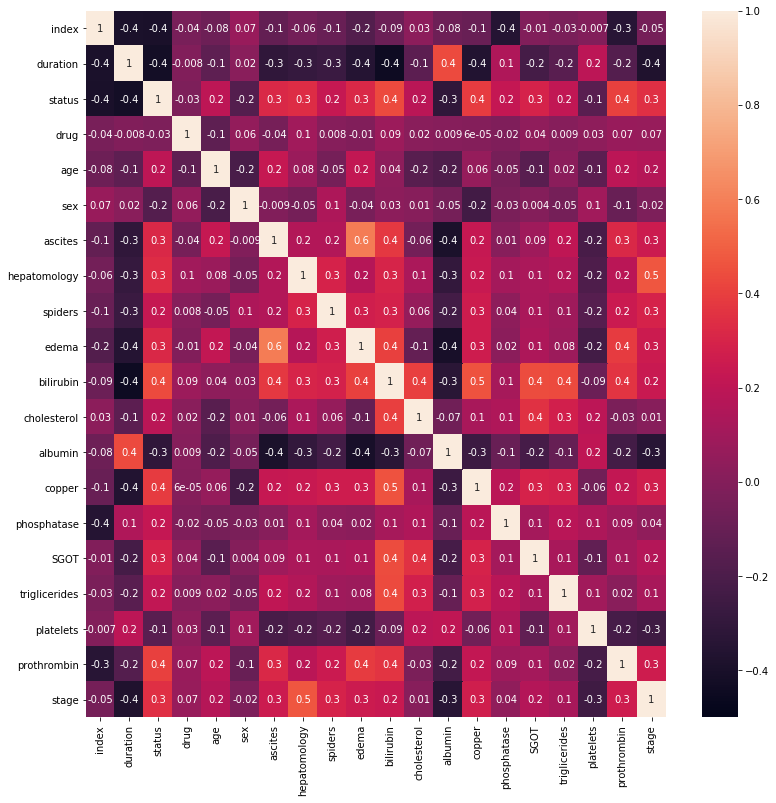

In [10]:
plt.figure(figsize=(13, 13))
ax=sns.heatmap(corrMatrix,vmin=-0.5, vmax=1,annot=True,fmt=".1g")

In [11]:
K_ascites=set(data['ascites'].astype(int))
K_ascites

{0, 1}

In [12]:
K_hepatomology =set(data['hepatomology'].astype(int))
K_hepatomology

{0, 1}

In [13]:
K_status =set(data['status'].astype(int))
K_status

{0, 1, 2}

In [14]:
K_stage =set(data['stage'].astype(int))
K_stage 

{1, 2, 3, 4}

## Lets replace all the null values with the median values

In [15]:
data['cholesterol'].replace(np.nan,data['cholesterol'].median(), inplace=True)
data['copper'].replace(np.nan,data['copper'].median(), inplace=True)
data['triglicerides'].replace(np.nan,data['triglicerides'].median(), inplace=True)
data['platelets'].replace(np.nan,data['platelets'].median(), inplace=True)

In [16]:
data.isnull().sum().sum()

0

In [17]:
data.drop(['index','albumin','platelets','sex','duration','drug','cholesterol'],axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 13 columns):
status           312 non-null int64
age              312 non-null int64
ascites          312 non-null int64
hepatomology     312 non-null int64
spiders          312 non-null int64
edema            312 non-null float64
bilirubin        312 non-null float64
copper           312 non-null float64
phosphatase      312 non-null float64
SGOT             312 non-null float64
triglicerides    312 non-null float64
prothrombin      312 non-null float64
stage            312 non-null int64
dtypes: float64(7), int64(6)
memory usage: 31.8 KB


## Training and Testing

In [19]:
data_Tst = data.sample(frac=0.20)
print(data_Tst.shape)
data_train=data.drop(data_Tst.index)
print(data_train.shape)
data_train.reset_index(drop=True)
print(data_train.shape)
data_train.head()

(62, 13)
(250, 13)
(250, 13)


,status,age,ascites,hepatomology,spiders,edema,bilirubin,copper,phosphatase,SGOT,triglicerides,prothrombin,stage
0,2,21464,1,1,1,1.0,14.5,156.0,1718.0,137.95,172.0,12.2,4
1,0,20617,0,1,1,0.0,1.1,54.0,7394.8,113.52,88.0,10.6,3
2,2,25594,0,0,0,0.5,1.4,210.0,516.0,96.10,55.0,12.0,4
3,2,19994,0,1,1,0.5,1.8,64.0,6121.8,60.63,92.0,10.3,4
4,1,13918,0,1,1,0.0,3.4,143.0,671.0,113.15,72.0,10.9,3


In [20]:
y=data_train['ascites'].to_numpy()
y.shape

(250,)

### Data Normalization for the training data


In [21]:
df_min_max_scaled = data_train.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

In [22]:
X=df_min_max_scaled.drop('ascites',axis=1).to_numpy()
X

array([[1.        , 0.62282175, 1.        , ..., 0.23104693, 0.39506173,
        1.        ],
       [0.        , 0.57836448, 1.        , ..., 0.07942238, 0.19753086,
        0.66666667],
       [1.        , 0.83959689, 0.        , ..., 0.0198556 , 0.37037037,
        1.        ],
       ...,
       [0.        , 0.69121352, 0.        , ..., 0.10108303, 0.14814815,
        0.33333333],
       [0.        , 0.22470082, 0.        , ..., 0.07942238, 0.18518519,
        0.33333333],
       [0.        , 0.13179719, 0.        , ..., 0.18953069, 0.22222222,
        0.33333333]])

## Equations

In [23]:
def sigmoid(h):
    return 1/(1+np.exp(-h))

def cross_entropy(y,p_hat):
    #print(np.log(p_hat))
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [24]:
class LogisticRegression():
    def __init__(self,thresh=0.5):
        self.thresh=thresh
        self.w=None
        self.b=None
        
    def fit(self,X,y,eta=1e-3,epochs=1e3,show_curve=False):
        epochs=int(epochs)
        N,D=X.shape
        
        self.w=np.random.randn(D)
        self.b=np.random.randn(1)
        J=np.zeros(epochs)
        for epoch in range(epochs):
            p_hat=self.__forward__(X)
            #print(p_hat)
            J[epoch]=cross_entropy(y,p_hat) # J=cost function
            #print('J[epoch]=',J[epoch])
            self.w-=eta*(1/N)*X.T@(p_hat-y)
            # print('self.w=',self.w)
            self.b-=eta*(1/N)*np.sum(p_hat-y)
            #print((self.b).shape)
        
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.show()
        
    def __forward__(self,X):
        return sigmoid(X@self.w+self.b)
        
    def predict(self,X):
        return (self.__forward__(X)>=self.thresh).astype(np.int32)
        

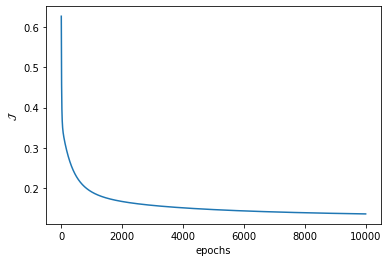

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X, y, eta = 1e-1,epochs=1e4, show_curve = True)

In [26]:
y_hat = log_reg.predict(X)

In [27]:
accuracy(y,y_hat)

0.952

# On the testing data
### Data Normalization

In [28]:
dfT_min_max_scaled = data_Tst.copy()
for column in dfT_min_max_scaled.columns:
    dfT_min_max_scaled[column] = (dfT_min_max_scaled[column] - dfT_min_max_scaled[column].min()) / (dfT_min_max_scaled[column].max() - dfT_min_max_scaled[column].min())

In [29]:
X_test=dfT_min_max_scaled.drop('ascites',axis=1).to_numpy()

In [30]:
yT=data_Tst['ascites'].to_numpy()
yT.shape

(62,)

In [31]:
yT_hat = log_reg.predict(X_test)

In [32]:
accuracy(yT,yT_hat)

0.9838709677419355

# Apply the Multivariate Logistic regression

In [33]:
def softmax(h):
    return (np.exp(h.T)/np.sum(np.exp(h),axis=1)).T

def cross_entropy(Y,P_hat):
    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

def indices_to_one_hot(data,nb_classes):
    targets=np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]


In [34]:
class MVLogisticRegression():

    def __init__(self, thresh =0.5):
        self.thresh =thresh
  
    def fit(self, X, y , eta=2e-1, epochs = 1e3, show_curve = False):
        epochs = int(epochs)
        N,D = X.shape
        K = len(np.unique(y))
        y_values = np.unique(y,return_index=False)
        Y = indices_to_one_hot(y, K).astype(int)
        self.W = np.random.randn(D,K)
        self.B = np.random.randn(1,K)

        J = np.zeros(int(epochs))

        for epoch in range(epochs):
            P_hat = self.__forward__(X)
            J[epoch] = cross_entropy(Y,P_hat)
            self.W -= eta*(1/N)*X.T@(P_hat-Y)
            #print(self.W.shape)
            self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)
            #print(self.B.shape)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()

    def __forward__(self, X):
        return softmax(X@self.W +self.B)

    def predict(self, X):
        return np.argmax(self.__forward__(X), axis=1)

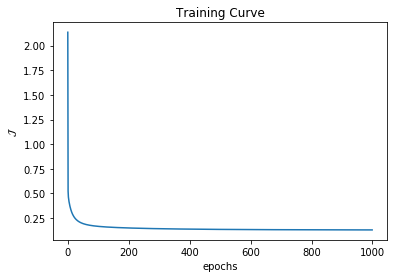

In [35]:
MVlogreg=MVLogisticRegression()
MVlogreg.fit(X, y, eta = 1, show_curve = True)

In [36]:
y_hat=MVlogreg.predict(X)

In [37]:
accuracy(y,y_hat)

0.968

In [38]:
yT_hat=MVlogreg.predict(X_test)

In [39]:
accuracy(yT,yT_hat)

0.9838709677419355